In [3]:
import os
from langgraph.prebuilt import create_react_agent
from langchain.chat_models import init_chat_model
from langgraph.checkpoint.memory import MemorySaver
from langchain_core.messages import HumanMessage
from dotenv import load_dotenv
from langchain_community.tools import DuckDuckGoSearchResults

# 1. Setup Environment and Memory
load_dotenv()
memory = MemorySaver()
config = {"configurable": {"thread_id": "scout_001"}}

# 2. Initialize Model (Llama 3.3 via Groq)
model = init_chat_model("llama-3.3-70b-versatile", model_provider="groq", max_tokens=4000)

# 3. Define the Search Tool
# We use DuckDuckGo to find latest competitor/product news
web_search_tool = DuckDuckGoSearchResults(output_format="list")
tools = [web_search_tool]

# 4. Create the React Agent (The Scout)
# This agent can now "Think" and then "Search" if it lacks info
agent_executor = create_react_agent(model, tools, checkpointer=memory)

# 5. Execute the Scout Query
# We ask it to find technical truths to avoid "rubbish" content
scout_query = """
Search for the latest technical capabilities of 'Claude Coworker' by Anthropic. 
Identify 3 specific things it can do with a local filesystem that a standard chatbot cannot.
Then, identify a 'Marketing Gap'—something it doesn't handle well (like privacy concerns or specific industries).
"""

print("🕵️‍♂️ Scout Agent is searching for technical truths...")
for event in agent_executor.stream(
    {"messages": [HumanMessage(content=scout_query)]}, config
):
    for value in event.values():
        # This will print the steps (Thought, Action, Observation)
        if "messages" in value:
            last_msg = value["messages"][-1]
            if hasattr(last_msg, 'content') and last_msg.content:
                print(f"\n--- Scout Progress ---\n{last_msg.content}")

/tmp/ipykernel_1564896/1103047228.py:24: LangGraphDeprecatedSinceV10: create_react_agent has been moved to `langchain.agents`. Please update your import to `from langchain.agents import create_agent`. Deprecated in LangGraph V1.0 to be removed in V2.0.
  agent_executor = create_react_agent(model, tools, checkpointer=memory)


🕵️‍♂️ Scout Agent is searching for technical truths...

--- Scout Progress ---
[{"snippet": "12 Jan 2026 · Key capabilities. Direct local file access: Claude can read from and write to your local files without manual uploads or downloads. Sub-agent coordination ...", "title": "Getting started with Cowork | Claude Help Center", "link": "https://support.claude.com/en/articles/13345190-getting-started-with-cowork"}, {"snippet": "16 Jan 2026 · It runs in a terminal and gives Claude the ability to read codebases, write files, and execute commands. ... locally, or use local files as input for external ...", "title": "Claude Cowork Tutorial: How to Use Anthropic's AI Desktop Agent", "link": "https://www.datacamp.com/tutorial/claude-cowork-tutorial"}, {"snippet": "12 Jan 2026 · Cowork brings Claude Code's agentic capabilities to the Claude desktop app. Give Claude access to a folder, set a task, and let it work. Missing: local filesystem", "title": "Introducing Cowork: Claude Code for the rest

In [8]:
import requests
from bs4 import BeautifulSoup
import os

def light_scout(url, day_name="Mon"):
    print(f"🕵️‍♂️ Lightweight Scouting: {url}...")
    
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36"
    }

    try:
        response = requests.get(url, headers=headers, timeout=15)
        response.raise_for_status()
        
        # Parse the HTML
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Remove "Rubbish" (Scripts, Styles, Nav, Footer)
        for element in soup(["script", "style", "nav", "footer", "header"]):
            element.decompose()
            
        # Get clean text
        clean_text = soup.get_text(separator='\n')
        
        # Save to your Intelligence folder
        intel_path = f"/nuvodata/User_data/shiva/Market_carousal/intelligence/{day_name}_scout.txt"
        os.makedirs(os.path.dirname(intel_path), exist_ok=True)
        
        with open(intel_path, "w") as f:
            f.write(clean_text)
            
        print(f"✅ Intelligence Saved: {intel_path}")
        return clean_text
        
    except Exception as e:
        print(f"❌ Light Scout failed: {e}")
        return None

# Usage:
light_scout("https://www.anthropic.com/news/claude-3-5-sonnet")

🕵️‍♂️ Lightweight Scouting: https://www.anthropic.com/news/claude-3-5-sonnet...
✅ Intelligence Saved: /nuvodata/User_data/shiva/Market_carousal/intelligence/Mon_scout.txt


'Announcements\nClaude 3.5 Sonnet\nJun 21, 2024\nTry on Claude.ai\nUpdate\nConsumer Terms and Privacy Policy\nAug 28, 2025\nToday, we’re launching Claude 3.5 Sonnet—our first release in the forthcoming Claude 3.5 model family. Claude 3.5 Sonnet raises the industry bar for intelligence, outperforming competitor models and Claude 3 Opus on a wide range of evaluations, with the speed and cost of our mid-tier model, Claude 3 Sonnet.\nClaude 3.5 Sonnet is now available for free on Claude.ai and the Claude iOS app, while Claude Pro and Team plan subscribers can access it with significantly higher rate limits. It is also available via the Anthropic \nAPI\n, \nAmazon Bedrock\n, and \nGoogle Cloud’s Vertex AI\n. The model costs $3 per million input tokens and $15 per million output tokens, with a 200K token context window.\nFrontier intelligence at 2x the speed\nClaude 3.5 Sonnet sets new industry benchmarks for graduate-level reasoning (GPQA), undergraduate-level knowledge (MMLU), and coding p

In [9]:
import requests
from bs4 import BeautifulSoup
import os
from concurrent.futures import ThreadPoolExecutor
from urllib.parse import urljoin

# --- CONFIG ---
INTEL_DIR = "/nuvodata/User_data/shiva/Market_carousal/intelligence"
os.makedirs(INTEL_DIR, exist_ok=True)

# Optimized Session for connection reuse
session = requests.Session()
session.headers.update({
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) Chrome/120.0.0.0 Safari/537.36"
})

def optimized_fetch(url):
    """Fetches and parses a single URL efficiently."""
    try:
        response = session.get(url, timeout=10)
        response.raise_for_status()
        
        # Use 'lxml' for C-based speed (pip install lxml)
        soup = BeautifulSoup(response.content, 'lxml')
        
        # EFFICIENCY: Target only the core content tags
        # Most professional blogs/sites use these tags for their actual content
        main_content = soup.find(['article', 'main', 'div.content', 'section'])
        if not main_content:
            main_content = soup.body # Fallback
            
        # Clean text: remove script/style/nav
        for tag in main_content(["script", "style", "nav", "footer", "header"]):
            tag.decompose()
            
        return main_content.get_text(separator=' ', strip=True)
    except Exception as e:
        return f"Error: {e}"

def batch_scout(url_list):
    """Scouts multiple competitors in parallel."""
    print(f"🚀 Starting Parallel Scout for {len(url_list)} targets...")
    
    # Use 5 threads (don't go too high to avoid getting blocked)
    with ThreadPoolExecutor(max_workers=5) as executor:
        results = list(executor.map(optimized_fetch, url_list))
    
    for i, content in enumerate(results):
        filename = f"competitor_{i+1}.txt"
        path = os.path.join(INTEL_DIR, filename)
        with open(path, "w") as f:
            f.write(content[:4000]) # Limit to 5000 chars for Llama efficiency
        print(f"✅ Saved: {path}")

# Example: Run it in your notebook
batch_scout(["https://openai.com/news", "https://www.anthropic.com/news"])

🚀 Starting Parallel Scout for 2 targets...
✅ Saved: /nuvodata/User_data/shiva/Market_carousal/intelligence/competitor_1.txt
✅ Saved: /nuvodata/User_data/shiva/Market_carousal/intelligence/competitor_2.txt


In [41]:
import os
from langchain_text_splitters import MarkdownHeaderTextSplitter, RecursiveCharacterTextSplitter
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS

# 1. Path Configuration
FILE_PATH = "/nuvodata/User_data/shiva/Market_carousal/knowledge.md"
FAISS_SAVE_PATH = "/nuvodata/User_data/shiva/Market_carousal/faiss_index"

# 2. Markdown Structural Splitting
headers_to_split_on = [
    ("#", "Header 1"),
    ("##", "Header 2"),
    ("###", "Header 3"),
]

with open(FILE_PATH, 'r') as f:
    markdown_content = f.read()

md_splitter = MarkdownHeaderTextSplitter(headers_to_split_on=headers_to_split_on)
md_header_splits = md_splitter.split_text(markdown_content)

# 3. Fine-tuning Chunk Size (Optional but recommended)
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100)
final_chunks = text_splitter.split_documents(md_header_splits)

# 4. Embeddings & FAISS Initialization
embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

# Create FAISS vector store
vector_store = FAISS.from_documents(final_chunks, embeddings)

# 5. Save the index locally
# This creates a folder containing the index and docstore mapping
vector_store.save_local(FAISS_SAVE_PATH)

print(f"FAISS index created with {len(final_chunks)} chunks and saved to {FAISS_SAVE_PATH}")

Loading weights: 100%|██████████| 103/103 [00:00<00:00, 1354.25it/s, Materializing param=pooler.dense.weight]                             
BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


FAISS index created with 17 chunks and saved to /nuvodata/User_data/shiva/Market_carousal/faiss_index


In [ ]:
from langchain_community.vectorstores import FAISS
from langchain_huggingface import HuggingFaceEmbeddings

# Load index
embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
new_db = FAISS.load_local(
    "/nuvodata/User_data/shiva/Market_carousal/faiss_index", 
    embeddings, 
    allow_dangerous_deserialization=True  # Required for loading local FAISS files
)

# Search
query = "What is Nueralogic's cost efficiency advantage?"
docs = new_db.similarity_search(query, k=2)

for i, doc in enumerate(docs):
    print(f"Result {i+1}: {doc.page_content}\n")

Loading weights: 100%|██████████| 103/103 [00:00<00:00, 1056.89it/s, Materializing param=pooler.dense.weight]                             
BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Result 1: * **Company Name:** Nueralogic
* **Website:** [https://nueralogic.com](https://nueralogic.com)
* **Positioning:** Execution-focused AI solutions and automation partner.
* **Core Description:** Nueralogic is an AI solutions company that helps enterprises design, build, and deploy production-grade AI systems that deliver measurable business outcomes. We specialize in custom AI models, intelligent automation, computer vision, LLM-powered systems, and data intelligence platforms.
* **The Nueralogic Difference:** Unlike traditional consultants, Nueralogic focuses on execution—shipping real systems that integrate directly into business workflows. We combine deep technical expertise with cost-efficient, high-tier engineering talent based in India, enabling clients to achieve ~40% cost savings without compromising quality, security, or scalability.  
---

Result 2: * **Execution over experimentation:** Production-grade AI, not just demos.
* **End-to-end ownership:** Strategy, build, 

In [40]:
import chromadb
# This is the "secret" command to reset the internal singleton
chromadb.api.shared_system_client.SharedSystemClient._identifier_to_system.clear()
print("🧹 Chroma System Cache Flushed.")

🧹 Chroma System Cache Flushed.


In [3]:
import os
import sys
from typing import List, Annotated, TypedDict, Literal
from langchain_groq import ChatGroq
from langchain_core.messages import SystemMessage, HumanMessage, AIMessage, ToolMessage, BaseMessage
from pydantic import BaseModel, Field
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode
from langgraph.checkpoint.memory import MemorySaver
from dotenv import load_dotenv

# --- 1. CONFIG & PATH FIX ---
load_dotenv()
GROQ_KEY = os.getenv("GROQ_API_KEY")

# Fix for Jupyter: Use current working directory instead of __file__
sys.path.append(os.getcwd())

# --- 2. STRUCTURED OUTPUT DEFINITION ---
class DailyPlan(BaseModel):
    day: str = Field(description="Day of the week (e.g., Monday)")
    framework: str = Field(description="Marketing framework used (PAS, AIDA, etc.)")
    topic: str = Field(description="The core topic for that day")
    angle: str = Field(description="The unique angle or hook")
    slide_content: List[str] = Field(description="List of 4-6 bullet points for slide content.")

class WeeklyContentCalendar(BaseModel):
    strategy_summary: str = Field(description="Brief high-level summary of the week's strategy")
    days: List[DailyPlan] = Field(description="List of 5 daily plans (Mon-Fri)")

# --- 3. TOOLS ---
from langchain_core.tools import tool

@tool
def submit_final_strategy(strategy: WeeklyContentCalendar):
    """Call this tool ONLY when the full strategy is ready."""
    return "Strategy Submitted Successfully"

# --- IMPORTANT: Replace these with your actual tool imports ---
# from tools.web_search import robust_web_search
# from tools.rag_search import retrieve_internal_knowledge
# ... etc

@tool
def mock_search(query: str):
    """Search for trends."""
    return f"Trends for {query}: Increased focus on AI-driven logistics and hyper-local delivery."

tools = [mock_search, submit_final_strategy] # Add your real tools here
tool_node = ToolNode(tools)

# --- 4. GRAPH LOGIC ---

class AgentState(TypedDict):
    messages: Annotated[List[BaseMessage], add_messages]

def call_model(state: AgentState):
    llm = ChatGroq(model="llama-3.3-70b-versatile", groq_api_key=GROQ_KEY, temperature=0.1)
    
    system_msg = SystemMessage(content="""
    You are a Lead Content Strategist for Nueralogic. 
    1. RESEARCH trends.
    2. STRATEGIZE 5 days of content.
    3. FINALIZE by calling `submit_final_strategy`.
    """)
    
    llm_with_tools = llm.bind_tools(tools)
    response = llm_with_tools.invoke([system_msg] + state["messages"])
    return {"messages": [response]}

def should_continue(state: AgentState) -> Literal["tools", "__end__"]:
    last_message = state["messages"][-1]
    if last_message.tool_calls:
        return "tools"
    return "__end__"

# --- 5. BUILD THE GRAPH ---



workflow = StateGraph(AgentState)

workflow.add_node("agent", call_model)
workflow.add_node("tools", tool_node)

workflow.add_edge(START, "agent")
workflow.add_conditional_edges("agent", should_continue)
workflow.add_edge("tools", "agent")

memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

# --- 6. EXECUTION ---
config = {"configurable": {"thread_id": "test_1"}}
user_input = "i want to do a marketing campaign for my food delivery company. write linkdin posts for me"

# Stream the results
events = app.stream(
    {"messages": [HumanMessage(content=user_input)]},
    config,
    stream_mode="values"
)

for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================ Human Message =================================

i want to do a marketing campaign for my food delivery company. write linkdin posts for me
================================== Ai Message ==================================
Tool Calls:
  mock_search (tdan5fz90)
 Call ID: tdan5fz90
  Args:
    query: food delivery marketing trends
================================= Tool Message =================================
Name: mock_search

Trends for food delivery marketing trends: Increased focus on AI-driven logistics and hyper-local delivery.
================================== Ai Message ==================================

Based on the trends, here's a potential LinkedIn post for your food delivery company:

"Exciting times ahead for the food delivery industry! With the rise of AI-driven logistics and hyper-local delivery, we're seeing a significant shift in the way we get our favorite foods to our doors. At [Your Company Name], we're committed to staying at the fo

In [1]:
import os
import sys
from typing import List, Annotated, TypedDict, Literal
from langchain_groq import ChatGroq
from langchain_core.messages import SystemMessage, HumanMessage, AIMessage, ToolMessage, BaseMessage
from pydantic import BaseModel, Field
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode
from langgraph.checkpoint.memory import MemorySaver
from dotenv import load_dotenv
from tools.carousel_renderer import generate_and_render_carousel# --- 1. CONFIG ---
load_dotenv()
sys.path.append(os.getcwd())

# --- 2. THE FINAL OUTPUT SCHEMA ---
class CarouselSlide(BaseModel):
    topic: str = Field(description="The main heading for the slide")
    content: str = Field(description="Body text for the slide")
    image_prompt: str = Field(description="AI image generation prompt for the background/visual")

class FinalStrategy(BaseModel):
    strategy_summary: str
    slides: List[CarouselSlide]

# --- 3. TOOLS ---
from langchain_core.tools import tool

@tool
def submit_final_strategy(strategy: FinalStrategy):
    """Call this ONLY when the user explicitly says 'Finalize' or 'Submit'."""
    # Here you could save to a JSON file
    import json
    with open("final_plan.json", "w") as f:
        json.dump(strategy.dict(), f, indent=4)
    return "SUCCESS: Strategy saved to final_plan.json"

# Placeholders for your specific logic (Import your real ones here)
@tool
def research_competitors(query: str):
    """Scouts competitors and trend analysis."""
    return f"Found 3 trending topics in {query}: RAG Optimizations, Agentic Workflows, and Local LLMs."

tools = [research_competitors, submit_final_strategy,generate_and_render_carousel]
tool_node = ToolNode(tools)

# --- 4. THE AGENT LOGIC ---
class AgentState(TypedDict):
    messages: Annotated[List[BaseMessage], add_messages]

def call_model(state: AgentState):
    llm = ChatGroq(model="llama-3.3-70b-versatile", temperature=0.2)
    
    prompt = SystemMessage(content="""
    You are a Lead Marketing Strategist for Nueralogic. 
    Your goal is to CO-CREATE a carousel with the user.
    
    1. Use tools to research trends/competitors when asked.
    2. Propose slide content (Topic, Content, Image Prompt).
    3. If the user suggests changes, update the content immediately.
    4. ONLY call `submit_final_strategy` when the user is 100% happy with the plan.
    5.Once the user says 'Generate' or 'Render', first ensure carousal.json is updated, then only call `render_carousel_slides` with a unique batch name.
    """)
    
    response = llm.bind_tools(tools).invoke([prompt] + state["messages"])
    return {"messages": [response]}

def router(state: AgentState):
    last_msg = state["messages"][-1]
    if last_msg.tool_calls:
        return "tools"
    return END

# --- 5. BUILD THE GRAPH ---
workflow = StateGraph(AgentState)
workflow.add_node("agent", call_model)
workflow.add_node("tools", tool_node)

workflow.add_edge(START, "agent")
workflow.add_conditional_edges("agent", router, {"tools": "tools", END: END})
workflow.add_edge("tools", "agent")

# MemorySaver allows the "Chat" aspect to work via thread_id
memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

# --- 6. INTERACTIVE CHAT SIMULATION ---
def chat_with_agent(user_text, thread_id="123"):
    config = {"configurable": {"thread_id": thread_id}}
    input_message = HumanMessage(content=user_text)
    
    for event in app.stream({"messages": [input_message]}, config, stream_mode="values"):
        # Just print the last message from the agent
        last_msg = event["messages"][-1]
        if isinstance(last_msg, AIMessage) and not last_msg.tool_calls:
            print(f"\n[Agent]: {last_msg.content}")
        elif isinstance(last_msg, ToolMessage):
            print(f"\n[Tool Result]: {last_msg.content}")

# --- TEST IT IN IPYNB ---
# 1. Start the conversation

# 2. Suggest a change (Simulating a second cell execution)
# chat_with_agent("Make slide 2 more technical and change the image prompt to a futuristic server room.")

# 3. Finalize
# chat_with_agent("This looks great, submit the final strategy now.")

/nuvodata/User_data/shiva/anaconda3/envs/ootd/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading weights: 100%|██████████| 103/103 [00:00<00:00, 1053.92it/s, Materializing param=pooler.dense.weight]                             
BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


In [3]:
chat_with_agent("ok create it")


/tmp/ipykernel_3946161/1087523504.py:35: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.12/migration/
  json.dump(strategy.dict(), f, indent=4)


🚀 Initializing Flux Pipeline...


Loading pipeline components...: 100%|██████████| 7/7 [00:18<00:00,  2.61s/it]
No LoRA keys associated to CLIPTextModel found with the prefix='text_encoder'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModel related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new


🎨 Generating BG for Slide 1...


100%|██████████| 18/18 [00:04<00:00,  3.68it/s]


🎨 Generating BG for Slide 2...


100%|██████████| 18/18 [00:04<00:00,  3.75it/s]


🎨 Generating BG for Slide 3...


100%|██████████| 18/18 [00:04<00:00,  3.75it/s]


🎨 Generating BG for Slide 4...


100%|██████████| 18/18 [00:04<00:00,  3.74it/s]


🎨 Rendering Text Overlays...

[Tool Result]: ✨ Success! Assets and PDF generated in /nuvodata/User_data/shiva/Market_carousal/output_slides/Nueralogic_Marketing_Plan

[Agent]: The marketing plan for Nueralogic has been created and saved to final_plan.json. The carousel has been generated and rendered, and the assets and PDF are available in the output_slides folder. Let me know if you need any further assistance!


/nuvodata/User_data/shiva/anaconda3/envs/ootd/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading weights: 100%|██████████| 103/103 [00:00<00:00, 1409.67it/s, Materializing param=pooler.dense.weight]                             
BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


🚀 Loading Flux to generate background...


Loading pipeline components...: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]
No LoRA keys associated to CLIPTextModel found with the prefix='text_encoder'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModel related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new


🎨 Generating image for: High quality realistic image of a futuristic glass warehouse with glowing blue data paths and translucent cargo drones, cinematic lighting


100%|██████████| 10/10 [00:02<00:00,  3.69it/s]


✍️ Applying Cairo rendering engine...


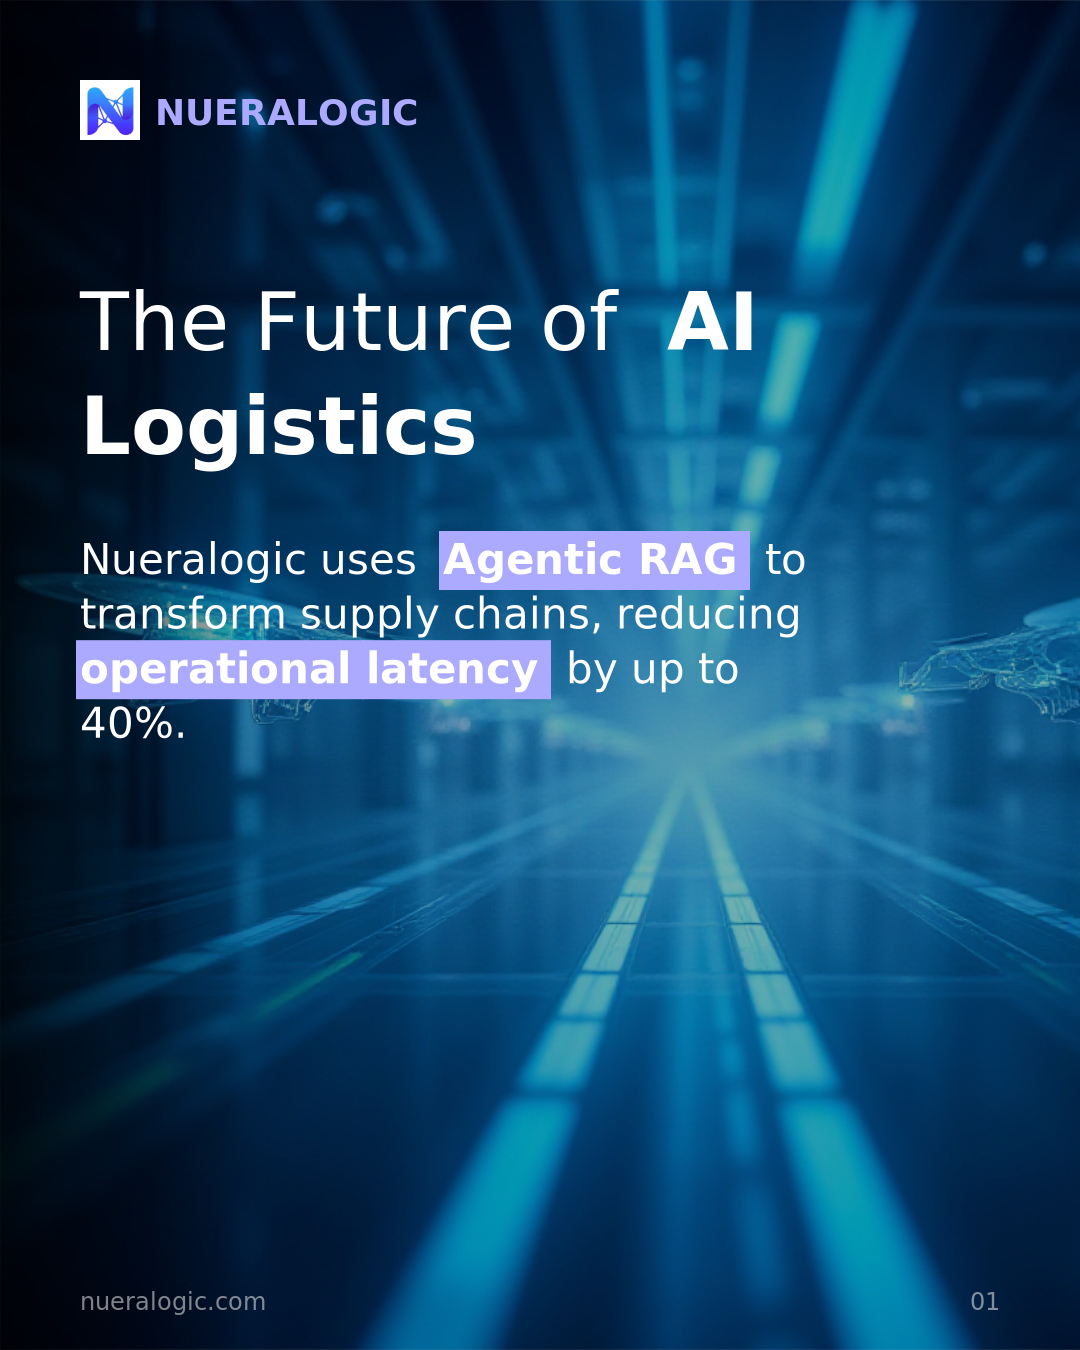

✅ Test complete. Final image saved as design_test_final.png


In [1]:
import torch
from diffusers import FluxPipeline
import os
import sys
import json
import cairo
from PIL import Image
from IPython.display import display

# Ensure tools are importable
sys.path.append(os.getcwd())
from tools.carousel_renderer import Renderer, THEME

def test_full_visual_pipeline(topic_text, content_text, image_prompt):
    BASE_PATH = "/nuvodata/User_data/shiva/Market_carousal"
    temp_bg = "test_flux_bg.png"
    final_output = "design_test_final.png"

    # --- PHASE 1: GENERATE AI BACKGROUND ---
    print("🚀 Loading Flux to generate background...")
    pipe = FluxPipeline.from_pretrained(
        "black-forest-labs/FLUX.1-dev",
        torch_dtype=torch.float16
    ).to("cuda:4")

    pipe.load_lora_weights("pictgencustomer/Carousel_127", weight_name="lora.safetensors")
    # # Add this line after initializing your 'pipe' to save VRAM
    # pipe.enable_sequential_cpu_offload()
    print(f"🎨 Generating image for: {image_prompt}")
    # Adding your specific constraints for clean backgrounds
    full_prompt = f"{image_prompt} --no text --no letters --no words --no logo, high quality, 8k. NO Blurry image"
    
    generated_image = pipe(
        prompt=full_prompt,
        height=1024,
        width=1024,
        guidance_scale=3.5,
        num_inference_steps=10 
    ).images[0]
    
    generated_image.save(temp_bg)
    
    # Clear VRAM for the rest of the notebook
    del pipe
    torch.cuda.empty_cache()

    # --- PHASE 2: RENDER MU SIGMA STYLE TEXT ---
    print("✍️ Applying Cairo rendering engine...")
    test_data = {
        "topic": topic_text,
        "content": content_text
    }

    renderer = Renderer()
    renderer.create_slide(test_data, final_output, temp_bg, 1)

    # --- PHASE 3: SHOW RESULT ---
    display(Image.open(final_output))
    print(f"✅ Test complete. Final image saved as {final_output}")

# --- 2. EXECUTE THE TEST ---
# You can change these strings to test different design scenarios
test_full_visual_pipeline(
    topic_text="The Future of <b>AI Logistics</b>", 
    content_text="Nueralogic uses <b>Agentic RAG</b> to transform supply chains, reducing <b>operational latency</b> by up to 40%.",
    image_prompt="High quality realistic image of a futuristic glass warehouse with glowing blue data paths and translucent cargo drones, cinematic lighting"
)

In [2]:
import torch
import gc

# 2. Trigger Python's garbage collector
gc.collect()

# 3. Tell PyTorch to release the cached memory to the OS
torch.cuda.empty_cache()

# 4. (Optional) Move to CPU first if you want to be extra safe
# pipe.to("cpu")